In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

from tqdm.notebook import tqdm

In [3]:
Data = pd.read_pickle(os.path.join(os.getcwd(), "merged_data"))

In [4]:
Data.shape

(301, 12)

In [5]:
Data.Rounds[0]

[{'Radiant_win': False,
  'radiant_hero_names': ['Centaur Warrunner',
   'Silencer',
   'Enigma',
   'Phantom Lancer',
   'Dragon Knight'],
  'dire_hero_names': ['Terrorblade',
   'Axe',
   'Crystal Maiden',
   'Brewmaster',
   'Mirana']},
 {'Radiant_win': False,
  'radiant_hero_names': ['Magnus', 'Undying', 'Rubick', 'Tiny', 'Luna'],
  'dire_hero_names': ['Centaur Warrunner',
   'Weaver',
   'Silencer',
   'Spectre',
   'Puck']}]

In [6]:
Data["Team_1_win_test"] = np.random.randint(0,1,Data.shape[0])

In [7]:
Data["Team_1_win_test"] = np.random.random(Data.shape[0])

In [8]:
def prob_convert(frac_odds):
    
    num, denom = np.array(frac_odds.split("/"), dtype = int)
    
    return denom/(num+denom)

def dec_convert(frac_odds):
    
    num, denom = np.array(frac_odds.split("/"), dtype = int)
    
    return num/denom

In [9]:
Data["Prob_1"] = [prob_convert(odds) for odds in Data["team_1_odds"]]
Data["Prob_2"] = [prob_convert(odds) for odds in Data["team_2_odds"]]

Data["Dec_1"] = [dec_convert(odds) for odds in Data["team_1_odds"]]
Data["Dec_2"] = [dec_convert(odds) for odds in Data["team_2_odds"]]

In [10]:
Data

,Score,Team_1,Team_2,team_1_odds,team_2_odds,Prob_1,Prob_2,T1_win,Day,Rounds,dire,radiant,Team_1_win_test,Dec_1,Dec_2
0,0:2,PSG.LGD,Evil Geniuses,61/100,137/100,0.621118,0.421941,0,17,"[{'Radiant_win': False, 'radiant_hero_names': ...",Evil Geniuses,PSG.LGD,0.515687,0.61,1.37
1,0:2,PSG.LGD,Evil Geniuses,27/50,71/50,0.649351,0.413223,0,17,"[{'Radiant_win': False, 'radiant_hero_names': ...",Evil Geniuses,PSG.LGD,0.065498,0.54,1.42
2,0:2,Team Secret,VGJ.Storm,33/100,9/4,0.751880,0.307692,0,16,"[{'Radiant_win': True, 'radiant_hero_names': [...",VGJ.Storm,Team Secret,0.360483,0.33,2.25
3,2:0,Team Liquid,LGD Gaming,79/100,23/25,0.558659,0.520833,1,12,"[{'Radiant_win': True, 'radiant_hero_names': [...",LGD Gaming,Team Liquid,0.047769,0.79,0.92
4,2:1,Newbee,LGD.Forever Young,139/100,14/25,0.418410,0.641026,1,11,"[{'Radiant_win': True, 'radiant_hero_names': [...",LGD.Forever Young,Newbee,0.833646,1.39,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0:2,Fnatic,OG,77/100,51/50,0.564972,0.495050,0,4,"[{'Radiant_win': False, 'radiant_hero_names': ...",OG,Fnatic,0.298443,0.77,1.02
297,2:0,Team Secret,Chaos Esports Club,13/100,493/100,0.884956,0.168634,1,4,"[{'Radiant_win': True, 'radiant_hero_names': [...",Chaos Esports Club,Team Secret,0.742965,0.13,4.93
298,1:2,Keen Gaming,Team Liquid,173/100,11/25,0.366300,0.694444,0,4,"[{'Radiant_win': True, 'radiant_hero_names': [...",Team Liquid,Keen Gaming,0.881797,1.73,0.44
299,1:2,Ninjas in Pyjamas,Chaos Esports Club,27/50,36/25,0.649351,0.409836,0,4,"[{'Radiant_win': True, 'radiant_hero_names': [...",Chaos Esports Club,Ninjas in Pyjamas,0.812628,0.54,1.44


In [11]:
def roc_plot(y_true, y_pred):
    
    fpr, tpr, t = roc_curve(y_true, y_pred)
    AUC = roc_auc_score(y_true, y_pred)

    scores = np.array([np.sqrt(((1-t)**2)+((0-(f))**2)) for f, t in zip(fpr,tpr)])
    threshi = np.argmin(scores)

    prec, rec, _ = precision_recall_curve(y_true, y_pred)

    opt = t[threshi]
    
    fig, (ax, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

    ax.plot(fpr, tpr)
    ax.plot([0,1],[0,1], linestyle = '--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ECS ROC Curve')
    ax.plot([0, fpr[threshi]], [1, tpr[threshi]], linestyle = "--")
    ax.text(0.8, 0.2, f"AUC {AUC:.2f}")

    ax2.plot(rec, prec)
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision Recall Curve')
    
    return fig

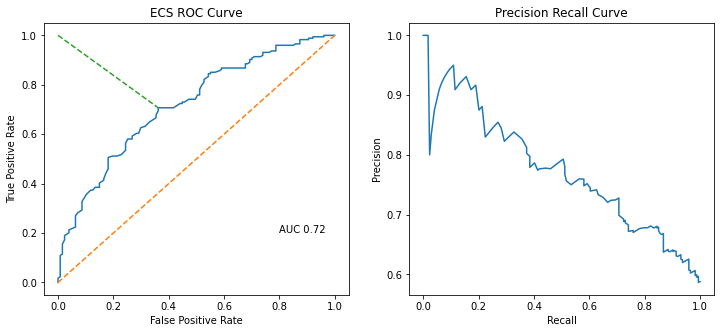

In [12]:
roc_plot(Data["T1_win"], Data["Prob_1"]);

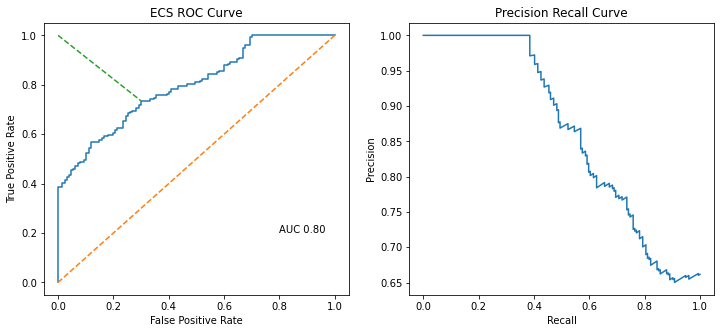

In [223]:
roc_plot(Data["T1_win"], Data["Team_1_win_test"]);

In [14]:
def simulate(Data, balance):
    
    output = []
    
    for i , row in Data.iterrows():
        
        match_stats = dict()
        match_stats['balance'] = balance

        # I think team 1 wins
        if row.Team_1_win_test > 0.5:
            
            print(i)

            # Calclate optimal stake using Kelly criterion
            frac = ((row.Team_1_win_test*(row.Dec_1+1))-1)/row.Dec_1
            
            frac = (((row.Dec_1-1)*row.Team_1_win_test)-(1-row.Team_1_win_test))/(row.Dec_1-1)
            match_stats['frac'] = frac

            stake = frac*balance
            match_stats["stake"] = stake
            
            if frac < 0: 
                stake = 0
                
            #if row.Team_1_win_test < 0.4: stake = 0

            # team 1 wins
            if row.T1_win == 1:

                profit = stake * row.Dec_1
                balance = balance + stake + profit

            # if team 2 wins
            else:
                balance = balance - stake

        # I think team 2 wins
        else:
            
            print(i)

            # Calclate optimal stake using Kelly criterion
            frac = (((1-row.Team_1_win_test)*(row.Dec_2+1))-1)/row.Dec_2
            
            frac = (((row.Dec_2-1)*row.Team_1_win_test)-(1-row.Team_1_win_test))/(row.Dec_2-1)
            match_stats['frac'] = frac
            
            stake = frac*balance
            match_stats["stake"]
            
            if frac < 0:
                stake = 0
                
            #if row.Team_1_win_test < 0.4: stake = 0

            # team 2 wins
            if row.T1_win == 0:

                profit = stake * row.Dec_2
                balance = balance + stake + profit

            # if team 2 wins
            else:
                balance = balance - stake

        balances.append(balance)
        
    return balances

In [47]:
def kelly(b, p):
    # Calculate Kelly criterion
    
    return (p*(b+1)-1)/b



def simulate_2(Data, start_balance, kelly_frac):
    
    balance = start_balance
    
    balances = []
    
    n = 0

    # Iterate through every match
    for i, row in Data.iterrows():
        
        results = dict()
        
        # Calculate Kelly criterion for each possible bet
        kelly1 = kelly(row.Dec_1, row.Team_1_win_test)
        kelly2 = kelly(row.Dec_2, 1-row.Team_1_win_test)
        
        # Do we have a viable bet?
        if np.max([kelly1, kelly2]) > 0:
            
            bet_choice = np.argmax([kelly1, kelly2])
            
            # Calculate stake given the best kelly score
            stake = balance * np.max([kelly1, kelly2]) * kelly_frac
            results["stake"] = stake
            
            # Stupidly they have to be opposite but whatever
            # Did team 1 win and i pick team 1 OR team 2 win and I pic?
            if (row.T1_win == 1 and bet_choice == 0) or (row.T1_win == 0 and bet_choice == 1):
                
                profit = stake*balance
                balance = balance + profit

            else:
                balance = balance - stake
                
        balances.append(balance)
    
    return pd.DataFrame([balances]).T

In [16]:
Data.sample(3)

,Score,Team_1,Team_2,team_1_odds,team_2_odds,Prob_1,Prob_2,T1_win,Day,Rounds,dire,radiant,Team_1_win_test,Dec_1,Dec_2
71,1:0,Virtus.pro,Vici Gaming,93/100,43/50,0.518135,0.537634,1,2,"[{'Radiant_win': True, 'radiant_hero_names': [...",Vici Gaming,Virtus.pro,0.808226,0.93,0.86
55,2:0,Virtus.pro,Alliance,11/25,44/25,0.694444,0.362319,1,18,"[{'Radiant_win': True, 'radiant_hero_names': [...",Alliance,Virtus.pro,0.753543,0.44,1.76
121,2:1,OG,Team Random,2/5,103/50,0.714286,0.326797,1,28,"[{'Radiant_win': True, 'radiant_hero_names': [...",Team Random,OG,0.438491,0.40,2.06


In [93]:
Data["Team_1_win_test"] = np.random.random(Data.shape[0])

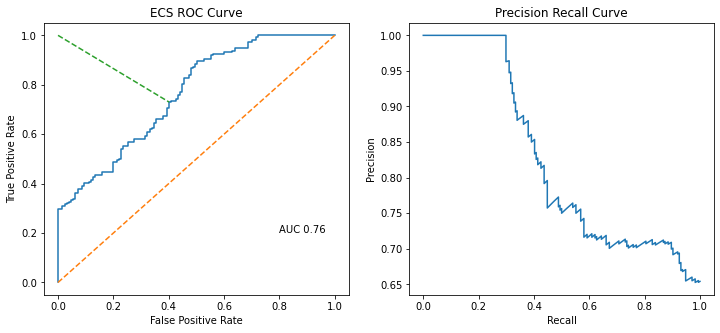

In [209]:
roc_plot(Data["T1_win"], Data["Team_1_win_test"]);

In [219]:
Data["Team_1_win_test"] = [np.random.uniform(0,0.75) if result == 0 else np.random.uniform(0.25,1) for result in Data["T1_win"]]
#Data["Team_1_win_test"] = Data["Team_1_win_test"] + [np.random.uniform(0,0.75) if result == 0 else np.random.uniform(0.25,1) for result in Data["T1_win"]]

Data["Team_1_win_test"] = (Data["Team_1_win_test"]/Data["Team_1_win_test"].max()) + Data["Team_1_win_test"].min()

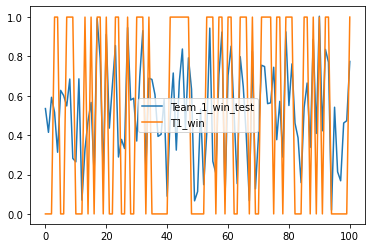

In [220]:
Data.loc[:100,["Team_1_win_test", "T1_win"]].plot()

In [230]:
results = pd.concat([simulate_2(Data.sample(frac = 1), 1, 0.05) for _ in tqdm(range(10))], axis = 1)

/home/conor/miniconda3/envs/PHD/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in double_scalars
/home/conor/miniconda3/envs/PHD/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


Text(0.5, 0, 'Bet event number')

/home/conor/miniconda3/envs/PHD/lib/python3.7/site-packages/matplotlib/ticker.py:2502: RuntimeWarning: overflow encountered in power
  ticklocs = b ** decades
/home/conor/miniconda3/envs/PHD/lib/python3.7/site-packages/matplotlib/ticker.py:2345: RuntimeWarning: invalid value encountered in double_scalars
  return abs(x - np.round(x)) < atol
/home/conor/miniconda3/envs/PHD/lib/python3.7/site-packages/matplotlib/ticker.py:1123: RuntimeWarning: invalid value encountered in double_scalars
  coeff = round(x / b ** exponent)


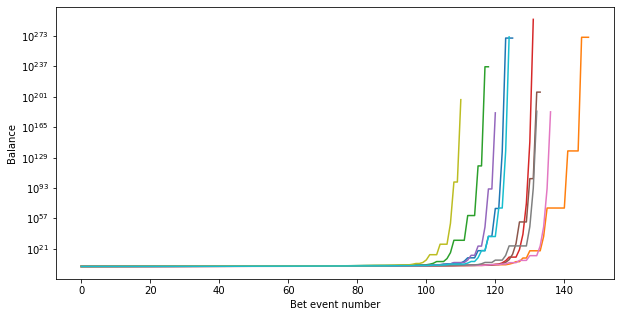

In [231]:
ax = results.iloc[:,:].plot(logy = True, figsize = (10,5), legend = False)
ax.set_ylabel("Balance")
ax.set_xlabel("Bet event number")
#results.T.mean().plot(logy = True)

In [24]:
def simulate(Data, balance):
    
    balance = balance
    balances = []
    
    for i , row in Data.iterrows():

        # I think team 1 wins
        if row.Team_1_win_test > 0.5:

            # Calclate optimal stake using Kelly criterion
            frac = ((row.Team_1_win_test*(row.Dec_1+1))-1)/row.Dec_1
            
            frac = (((row.Dec_1-1)*row.Team_1_win_test)-(1-row.Team_1_win_test))/row.Dec_1-1

            stake = frac*balance

            if frac < 0: 
                stake = 0
                
            #if row.Team_1_win_test < 0.4: stake = 0

            # team 1 wins
            if row.T1_win == 1:

                profit = stake * row.Dec_1
                balance = balance + stake + profit

            # if team 2 wins
            else:
                balance = balance - stake

        # I think team 2 wins
        else:

            # Calclate optimal stake using Kelly criterion
            frac = (((1-row.Team_1_win_test)*(row.Dec_2+1))-1)/row.Dec_2
            
            frac = (((row.Dec_2-1)*row.Team_1_win_test)-(1-row.Team_1_win_test))/row.Dec_2-1
            
            stake = frac*balance

            if frac < 0:
                stake = 0
                
            #if row.Team_1_win_test < 0.4: stake = 0

            # team 2 wins
            if row.T1_win == 0:

                profit = stake * row.Dec_2
                balance = balance + stake + profit

            # if team 2 wins
            else:
                balance = balance - stake

        balances.append(balance)
        
    return balances

In [25]:
Data["Team_1_win_test"] = Data["T1_win"]

In [26]:
Data

,Score,Team_1,Team_2,team_1_odds,team_2_odds,Prob_1,Prob_2,T1_win,Day,Rounds,dire,radiant,Team_1_win_test,Dec_1,Dec_2
0,0:2,PSG.LGD,Evil Geniuses,61/100,137/100,0.621118,0.421941,0,17,"[{'Radiant_win': False, 'radiant_hero_names': ...",Evil Geniuses,PSG.LGD,0,0.61,1.37
1,0:2,PSG.LGD,Evil Geniuses,27/50,71/50,0.649351,0.413223,0,17,"[{'Radiant_win': False, 'radiant_hero_names': ...",Evil Geniuses,PSG.LGD,0,0.54,1.42
2,0:2,Team Secret,VGJ.Storm,33/100,9/4,0.751880,0.307692,0,16,"[{'Radiant_win': True, 'radiant_hero_names': [...",VGJ.Storm,Team Secret,0,0.33,2.25
3,2:0,Team Liquid,LGD Gaming,79/100,23/25,0.558659,0.520833,1,12,"[{'Radiant_win': True, 'radiant_hero_names': [...",LGD Gaming,Team Liquid,1,0.79,0.92
4,2:1,Newbee,LGD.Forever Young,139/100,14/25,0.418410,0.641026,1,11,"[{'Radiant_win': True, 'radiant_hero_names': [...",LGD.Forever Young,Newbee,1,1.39,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0:2,Fnatic,OG,77/100,51/50,0.564972,0.495050,0,4,"[{'Radiant_win': False, 'radiant_hero_names': ...",OG,Fnatic,0,0.77,1.02
297,2:0,Team Secret,Chaos Esports Club,13/100,493/100,0.884956,0.168634,1,4,"[{'Radiant_win': True, 'radiant_hero_names': [...",Chaos Esports Club,Team Secret,1,0.13,4.93
298,1:2,Keen Gaming,Team Liquid,173/100,11/25,0.366300,0.694444,0,4,"[{'Radiant_win': True, 'radiant_hero_names': [...",Team Liquid,Keen Gaming,0,1.73,0.44
299,1:2,Ninjas in Pyjamas,Chaos Esports Club,27/50,36/25,0.649351,0.409836,0,4,"[{'Radiant_win': True, 'radiant_hero_names': [...",Chaos Esports Club,Ninjas in Pyjamas,0,0.54,1.44


In [27]:
results = pd.DataFrame([simulate(Data.sample(frac = 1), balance = 1) for _ in range(10)]).T

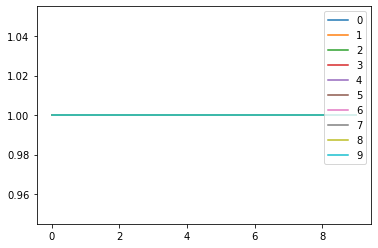

In [28]:
results.iloc[:10].plot()

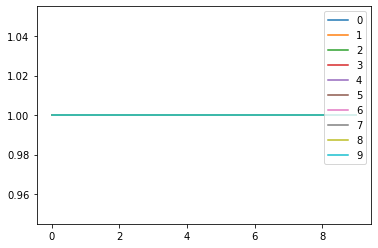

In [29]:
results.iloc[:10].plot()

In [30]:
from tqdm.notebook import tqdm

In [31]:
results = dict()

for thresh in tqdm(np.arange(0,1,0.1)):
    
    Data["Team_1_win_test"] = [np.random.uniform(0,0.5) if result == 0 else np.random.uniform(0.5,1) for result in Data["T1_win"]]
    
    # Add noise to the destimate
    Data["Team_1_win_test"] = Data["Team_1_win_test"] + np.random.uniform(0, thresh,len(Data["T1_win"]))
    
    # Run the simulation a few times with shuffled events
    results[thresh] = pd.DataFrame([simulate(Data.sample(frac = 1), balance = 1000) for _ in range(20)])
    
results = pd.concat(results, names = ["Thresh"])

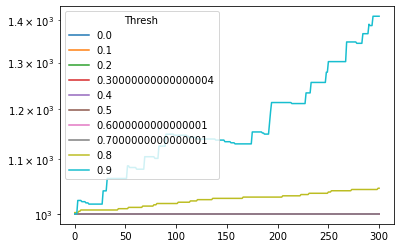

In [32]:
results.groupby("Thresh").mean().T.plot(logy = True)

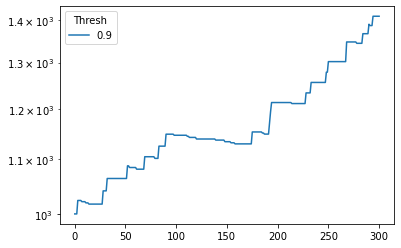

In [33]:
results.query("Thresh == 0.9").groupby("Thresh").mean().T.plot(logy = True)

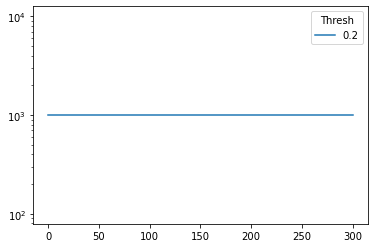

In [34]:
results.query("Thresh == 0.2").groupby("Thresh").mean().T.plot(logy = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8aa5f59c50>]],
      dtype=object)

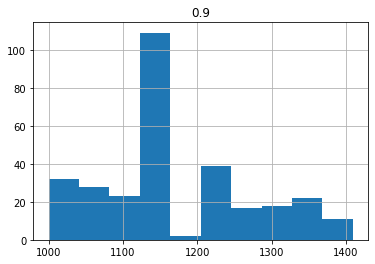

In [35]:
results.query("Thresh == 0.9").groupby("Thresh").mean().T.hist()